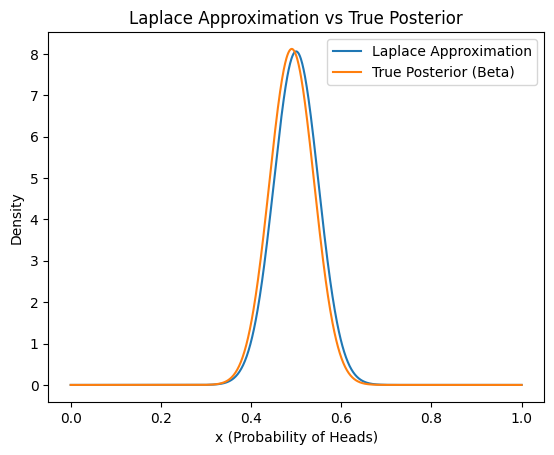

In [243]:
import numpy as np
from scipy.stats import beta, bernoulli, norm
import matplotlib.pyplot as plt

# Generate a synthetic dataset
dataset = np.random.randint(2, size=100)

# Prior distribution (Beta distribution parameters)
alpha_prior = 2
beta_prior = 2

# Likelihood function (Bernoulli distribution parameter)
def likelihood(theta, data):
    return np.prod(theta ** data * (1 - theta) ** (1 - data))

# Calculate the unnormalized posterior
def unnormalized_posterior(theta, data):
    return beta.pdf(theta, alpha_prior, beta_prior) * likelihood(theta, data)

# Find the mode (maximum a posteriori estimate)
from scipy.optimize import minimize

initial_guess = 0.5  # Initial guess for mode
result = minimize(lambda x: -unnormalized_posterior(x, dataset), initial_guess)
mode = result.x[0]

# Compute the second derivative of the logarithm of the unnormalized posterior at the mode
def posterior_log_prob(theta):
    return np.log(unnormalized_posterior(theta, dataset))

# Calculate the second derivative at the mode using finite differences
epsilon = 1e-6
second_derivative = (posterior_log_prob(mode + epsilon) - 2 * posterior_log_prob(mode) + posterior_log_prob(mode - epsilon)) / epsilon**2

# Approximate the posterior using a Gaussian distribution
posterior_approx = norm(loc=mode, scale=np.sqrt(1 / -second_derivative))

# True posterior (closed-form solution)
true_posterior = beta(alpha_prior + dataset.sum(), beta_prior + len(dataset) - dataset.sum())

# Plot the results
x = np.linspace(0, 1, 1000)
plt.plot(x, posterior_approx.pdf(x), label='Laplace Approximation')
plt.plot(x, true_posterior.pdf(x), label='True Posterior (Beta)')
plt.legend()
plt.xlabel('x (Probability of Heads)')
plt.ylabel('Density')
plt.title('Laplace Approximation vs True Posterior')
plt.show()


In [2]:
import numpy as np
from scipy.stats import beta, bernoulli, norm
import matplotlib.pyplot as plt
import torch
from scipy.optimize import minimize


In [3]:
# Generate data using a Bernoulli distribution from torch
dataset = torch.distributions.Bernoulli(torch.tensor([0.2])).sample((1000,))
print('Number of heads: {}'.format(dataset.sum()))

Number of heads: 196.0


In [4]:
# Prior distribution (Beta distribution parameters)
alpha_prior = 2
beta_prior = 2

# Log Likelihood function (Bernoulli distribution parameter)
def log_likelihood(theta, data):
    return torch.distributions.Bernoulli(theta).log_prob(data).sum()

def likelihood(theta, data):
    return torch.exp(log_likelihood(theta, data))

const = 1

# Calculate the unnormalized posterior"
def log_unnormalized_posterior(theta, data):
    return const*torch.distributions.Beta(alpha_prior , beta_prior).log_prob(torch.tensor(theta)) + log_likelihood(theta, data)

Max log likelihood: 0.1962


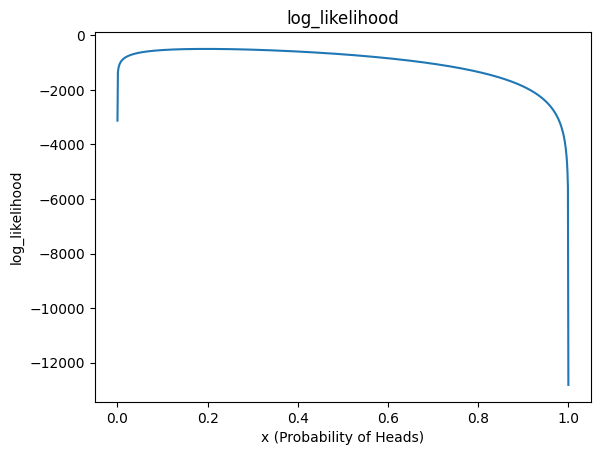

In [5]:
# Plot the likelihood from theta 0 to 1
x = np.linspace(0, 1, 1000)
log_likelihood_vector = []
for i in range(len(x)):
    log_likelihood_vector.append(log_likelihood(x[i], dataset))

# Max likelihood
max_log_likelihood = x[np.argmax(log_likelihood_vector)]
print('Max log likelihood: {:.4f}'.format(max_log_likelihood))

plt.plot(x, log_likelihood_vector)
plt.xlabel('x (Probability of Heads)')
plt.ylabel('log_likelihood')
plt.title('log_likelihood')
plt.show()

C:\Users\Inder\AppData\Local\Temp\ipykernel_32264\4118039423.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return const*torch.distributions.Beta(alpha_prior , beta_prior).log_prob(torch.tensor(theta)) + log_likelihood(theta, data)


[tensor(-inf, dtype=torch.float64), tensor(-1359.6453, dtype=torch.float64), tensor(-1223.9022, dtype=torch.float64), tensor(-1144.8336, dtype=torch.float64), tensor(-1088.9686, dtype=torch.float64), tensor(-1045.8189, dtype=torch.float64), tensor(-1010.7117, dtype=torch.float64), tensor(-981.1550, dtype=torch.float64), tensor(-955.6615, dtype=torch.float64), tensor(-933.2708, dtype=torch.float64), tensor(-913.3285, dtype=torch.float64), tensor(-895.3667, dtype=torch.float64), tensor(-879.0407, dtype=torch.float64), tensor(-864.0879, dtype=torch.float64), tensor(-850.3057, dtype=torch.float64), tensor(-837.5320, dtype=torch.float64), tensor(-825.6363, dtype=torch.float64), tensor(-814.5125, dtype=torch.float64), tensor(-804.0726, dtype=torch.float64), tensor(-794.2424, dtype=torch.float64), tensor(-784.9594, dtype=torch.float64), tensor(-776.1702, dtype=torch.float64), tensor(-767.8294, dtype=torch.float64), tensor(-759.8967, dtype=torch.float64), tensor(-752.3378, dtype=torch.float64)

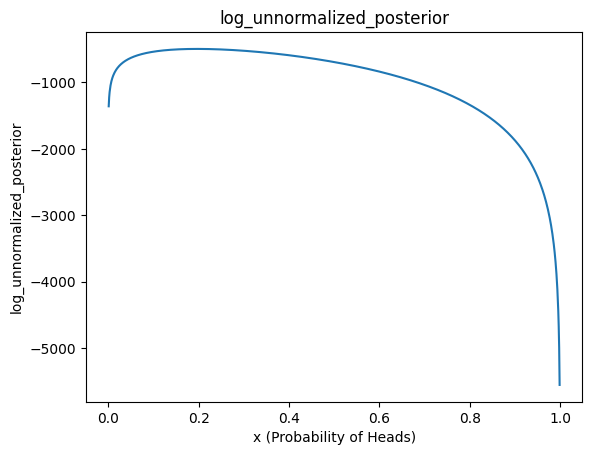

In [15]:
# Plot the unnormlized posterior from theta 0 to 1
x = np.linspace(0, 1, 1000)
log_unnormalized_posterior_vector = []
for i in range(len(x)):
    log_unnormalized_posterior_vector.append(log_unnormalized_posterior(torch.tensor(x[i]), dataset.ravel()))

print( log_unnormalized_posterior_vector)

# Max unnormalized posterior
max_log_unnormalized_posterior = x[np.argmax(log_unnormalized_posterior_vector)]
print('Max log unnormalized posterior: {:.4f}'.format(max_log_unnormalized_posterior))

plt.plot(x, log_unnormalized_posterior_vector)
plt.xlabel('x (Probability of Heads)')
plt.ylabel('log_unnormalized_posterior')
plt.title('log_unnormalized_posterior')
plt.show()

C:\Users\Inder\AppData\Local\Temp\ipykernel_32264\4118039423.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return const*torch.distributions.Beta(alpha_prior , beta_prior).log_prob(torch.tensor(theta)) + log_likelihood(theta, data)


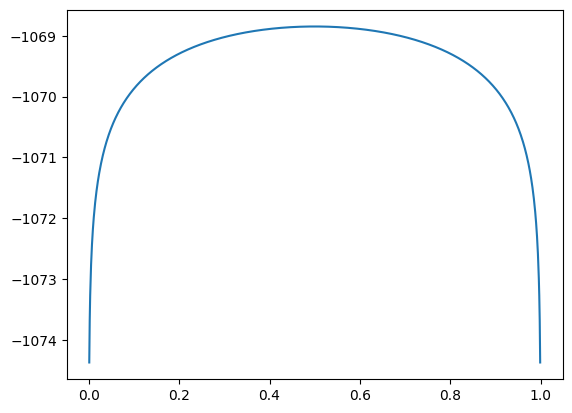

In [14]:
# Plot the unnormlized posterior from theta 0 to 1
x = np.linspace(0, 1, 1000)

y = log_unnormalized_posterior(torch.tensor(x) , dataset.ravel())

plt.plot(x, y)

In [11]:
dataset.shape

torch.Size([1000, 1])

C:\Users\Inder\AppData\Local\Temp\ipykernel_37516\4118039423.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return const*torch.distributions.Beta(alpha_prior , beta_prior).log_prob(torch.tensor(theta)) + log_likelihood(theta, data)


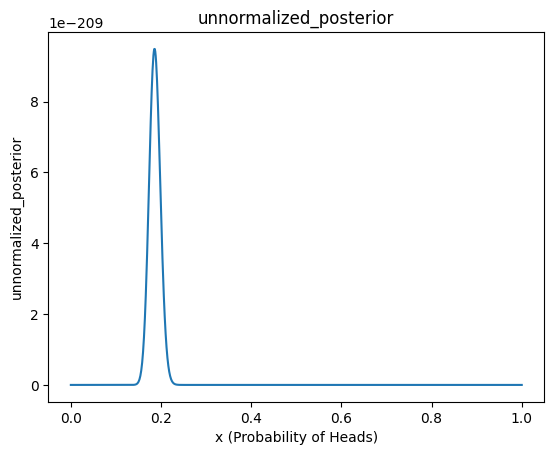

In [ ]:
# Plot the unnormalized posterior from theta 0 to 1
x = np.linspace(0, 1, 1000)
unnormalized_posterior_vector = []
for i in range(len(x)):
    unnormalized_posterior_vector.append(torch.exp(log_unnormalized_posterior(torch.tensor(x[i]), dataset)))

plt.plot(x, unnormalized_posterior_vector)
plt.xlabel('x (Probability of Heads)')
plt.ylabel('unnormalized_posterior')
plt.title('unnormalized_posterior')
plt.show()

In [ ]:
epsilon = 1e-6
mode = max_log_unnormalized_posterior
second_derivative = (log_unnormalized_posterior(mode + epsilon , dataset) - 2 * log_unnormalized_posterior(mode, dataset) + log_unnormalized_posterior(mode - epsilon, dataset)) / epsilon**2
print('Second derivative at mode: {:.4f}'.format(second_derivative))

Second derivative at mode: 122070281.7477


In [ ]:
# Approximate the posterior using a Gaussian distribution
posterior_laplace = torch.distributions.Normal(mode, np.sqrt(1 / abs(second_derivative)))

# True posterior (closed-form solution)
true_posterior = torch.distributions.Beta(alpha_prior + dataset.sum(), beta_prior + len(dataset) - dataset.sum())

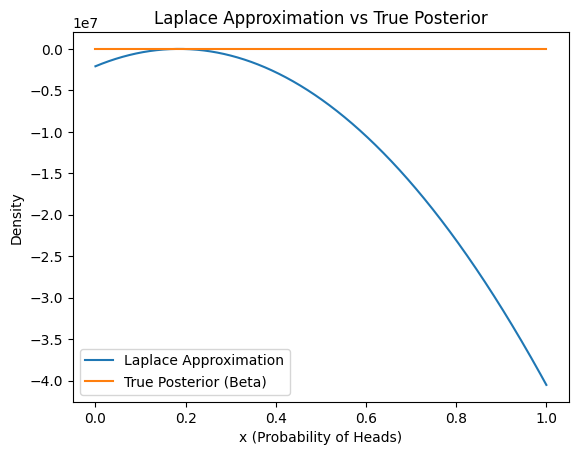

In [ ]:
# Plot posterior_laplace and true_posterior

x = np.linspace(0, 1, 1000)
posterior_laplace_vector = []
for i in range(len(x)):
    posterior_laplace_vector.append(posterior_laplace.log_prob(torch.tensor(x[i])))

plt.plot(x, posterior_laplace_vector, label='Laplace Approximation')
plt.plot(x, unnormalized_posterior_vector, label='True Posterior (Beta)')
plt.legend()
plt.xlabel('x (Probability of Heads)')
plt.ylabel('Density')
plt.title('Laplace Approximation vs True Posterior')
plt.show()